# Polar aurora forecasting

by Viktor Liviniuk, Alina Liviniuk and Evgenii Safronov <br>
May, 2018 <br>
Skoltech

## Part 1

In [1]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import csv 
import sys

import numpy as np
import pandas as pd

from scipy import interpolate, stats
import  struct, time, datetime, os, glob, errno, threading, logging
import numpy as np
%matplotlib inline

#seaborns
plt.style.use(['seaborn-white', 'seaborn-paper'])
#calling rc is equivalent to setting rcParams
width = 3.5
plt.rc('figure', figsize=(6, 2), dpi=600)
plt.rc('font', family='serif', serif='DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=5, frameon=True)
plt.rc('axes', labelsize=8, titlesize=8)

In [3]:
#download and preparing data
data = np.loadtxt("Data.lst")

BY = data[:, 4]
BZ = data[:, 5] 
WindSpeed = data[:, 6] 
Kp = data[:, 7] / 10
AL = data[:, 8] 

In [4]:
b00 = [-0.07, -10.06, -4.44, -3.77, -6.61, 6.37, -4.48]
b10 = [24.54, 19.83, 7.47, 7.90, 10.17, -1.10, 10.16]
b20 = [-12.53, -9.33, -3.01, -4.73, -5.80, 0.34, -5.87]
b30 = [2.15, 1.24, 0.25, 0.91, 1.19, -0.38, 0.98]

b01 = [1.61, -9.59, -12.07, -6.56, -2.22, -23.98, -20.07]
b11 = [23.21, 17.78, 17.49, 11.44, 1.50, 42.79, 36.67]
b21 = [-10.97, -7.20, -7.96, -6.73, -0.58, -26.96, -24.20]
b31 = [2.03, 0.96, 1.15, 1.31, 0.08, 5.56, 5.11]

b02 = [3.44, -2.41, -0.74, -2.12, -1.68, 8.69, 8.61]
b12 = [29.77, 7.89, 3.94, 3.24, -2.48, -2.73, -5.34]
b22 = [-16.38, -4.32, -3.09, -1.67, 1.58, 13.03, -1.36]
b32 = [3.35, 0.87, 0.72, 0.31, -0.28, -2.14, 0.76]
AL_range = [-10, -100, -200, -300, -400, -500, -600, -700, -800]

A_alpha_pole = np.zeros((len(AL_range),7))
A_alpha_equator = np.zeros((len(AL_range),7))
A_alpha_diffuse = np.zeros((len(AL_range),7))

In [5]:
for i in range (0,len(AL_range)-1):
    for j in range (0,6):
        A_alpha_pole[i,j] = b00[j] + b10[j] * np.log10(abs(AL_range[i])) + b20[j]*np.log10(abs(AL_range[i])) **2 + b30[j]*np.log10(abs(AL_range[i])) **3
        A_alpha_equator[i,j] = b01[j] + b11[j]*np.log10(abs(AL_range[i])) + b21[j]*np.log10(abs(AL_range[i])) **2 + b31[j]*np.log10(abs(AL_range[i])) **3
        A_alpha_diffuse[i,j] = b02[j] + b12[j]*np.log10(abs(AL_range[i])) + b22[j]*np.log10(abs(AL_range[i])) **2 + b32[j]*np.log10(abs(AL_range[i])) **3

theta_pole = np.zeros((len(AL_range),24))
theta_equator = np.zeros((len(AL_range),24))
theta_diffuse = np.zeros((len(AL_range),24))

In [6]:
for i in range (0,len(AL_range) - 1):
    for t in range (0,23):
        theta_pole[i,t+1] = 90 - A_alpha_pole[i,0] + A_alpha_pole[i,1]*math.cos(15*(t+A_alpha_pole[i,4])*math.pi/180) + (A_alpha_pole[i,2]) * math.cos(15*(2*t+A_alpha_pole[i,5])*math.pi/180) + A_alpha_pole[i,3]*math.cos(15*(3*t+A_alpha_pole[i,6])*math.pi/180)
        theta_equator[i,t+1] = 90 - A_alpha_equator[i,0] + A_alpha_equator[i,1]*math.cos(15*(t+A_alpha_equator[i,4])*math.pi/180) + A_alpha_equator[i,2]*math.cos(15*(2*t+A_alpha_equator[i,5])*math.pi/180) + A_alpha_equator[i,3]*math.cos(15*(3*t+A_alpha_equator[i,6])*math.pi/180)
        theta_diffuse[i,t+1] = 90 - A_alpha_diffuse[i,0] + A_alpha_diffuse[i,1]*math.cos(15*(t+A_alpha_diffuse[i,4])*math.pi/180) + A_alpha_diffuse[i,2]*math.cos(15*(2*t+A_alpha_diffuse[i,5])*math.pi/180) + A_alpha_diffuse[i,3]*math.cos(15*(3*t+A_alpha_diffuse[i,6])*math.pi/180)

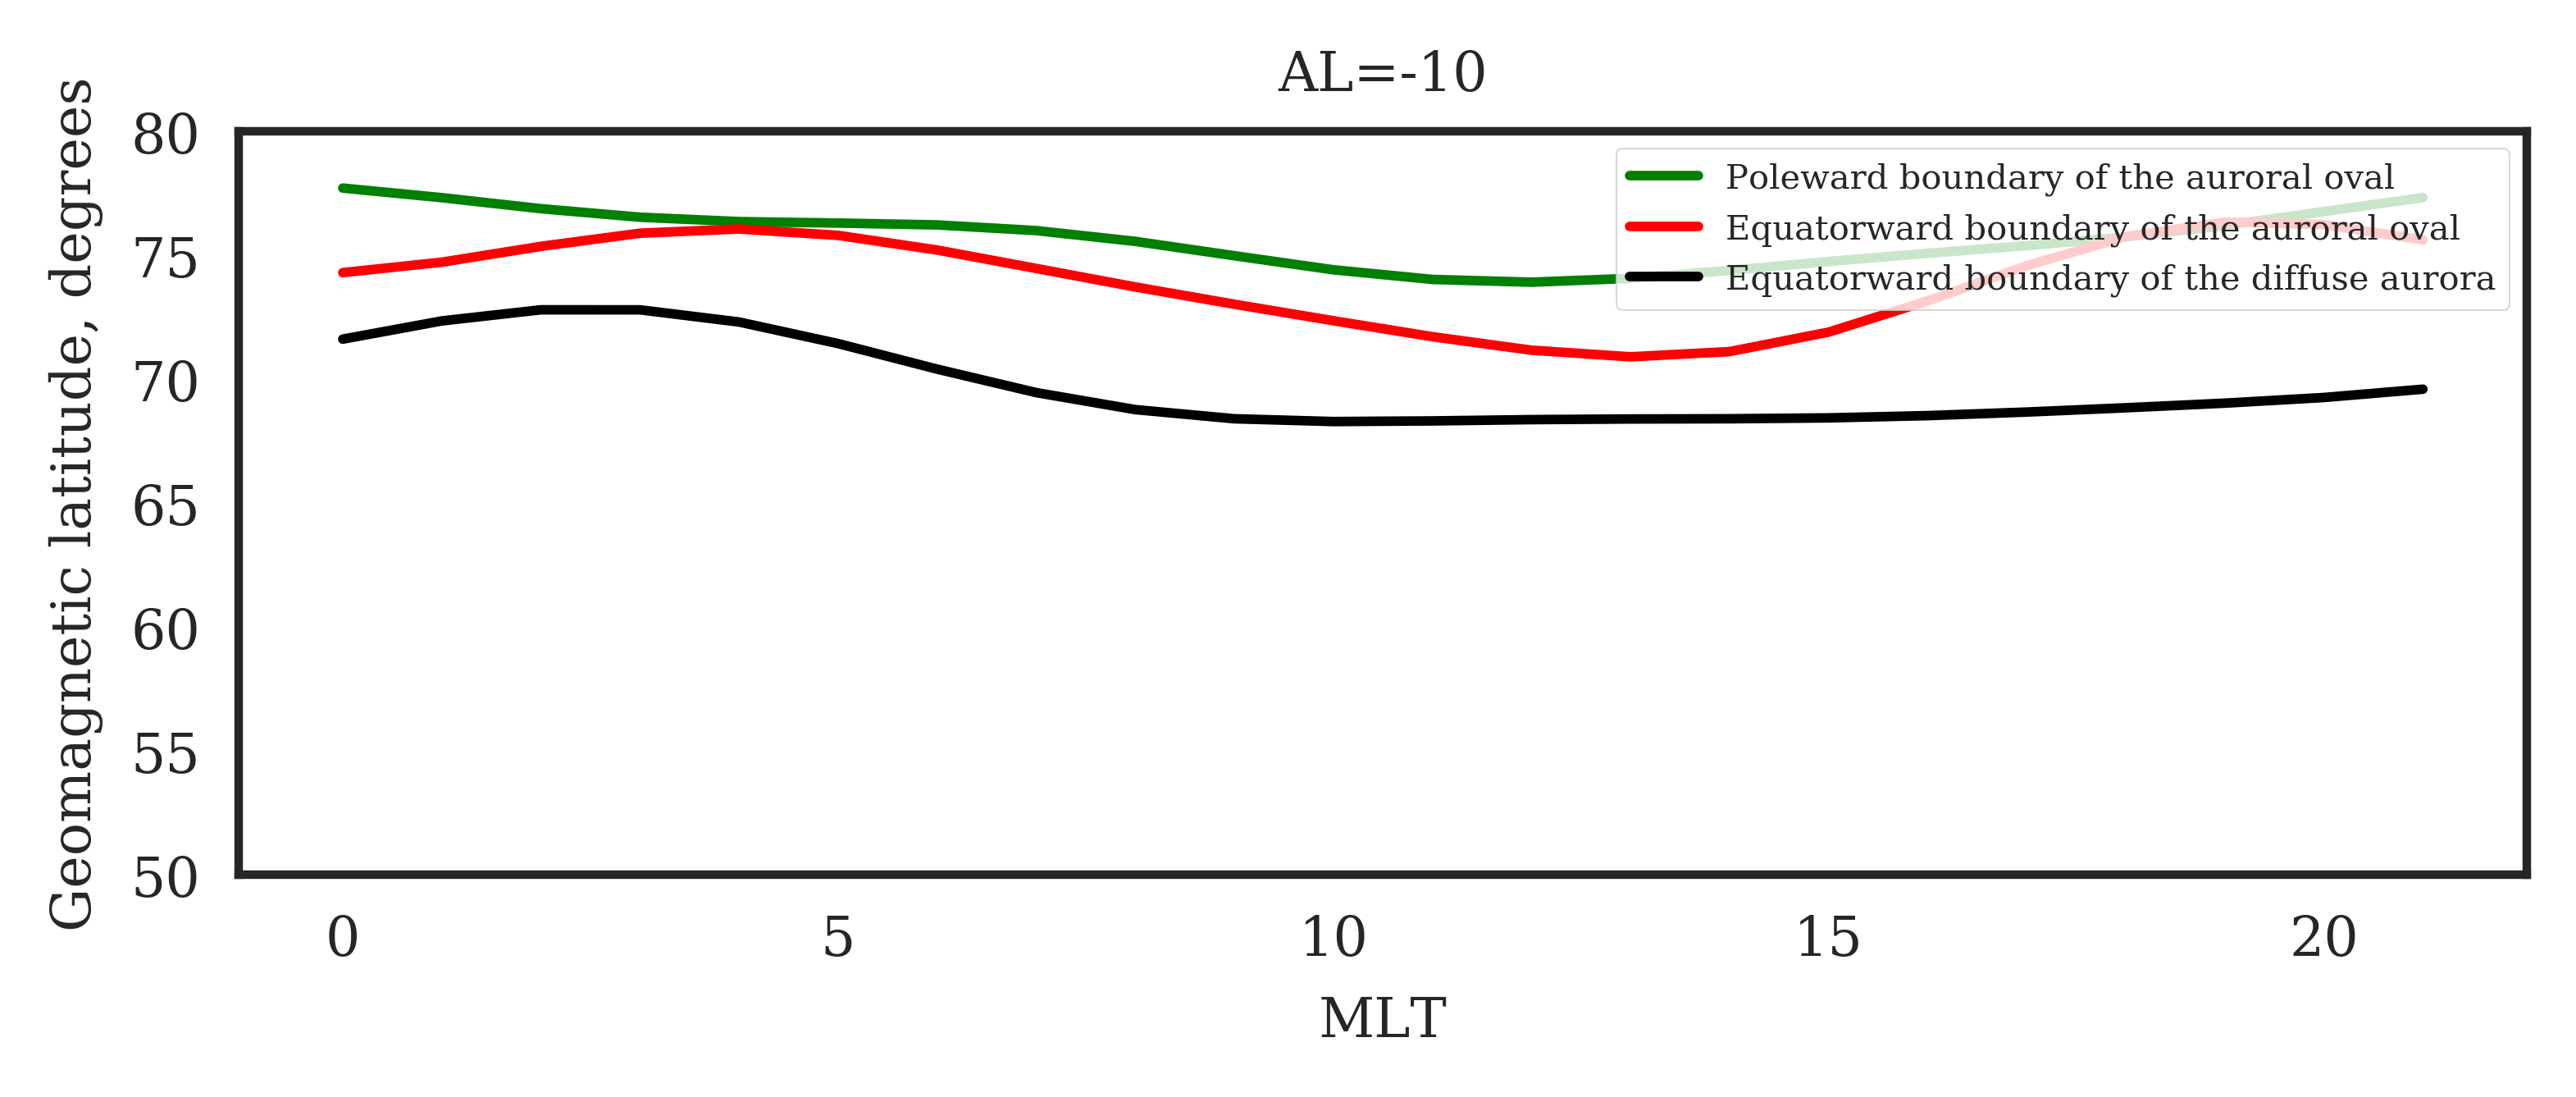

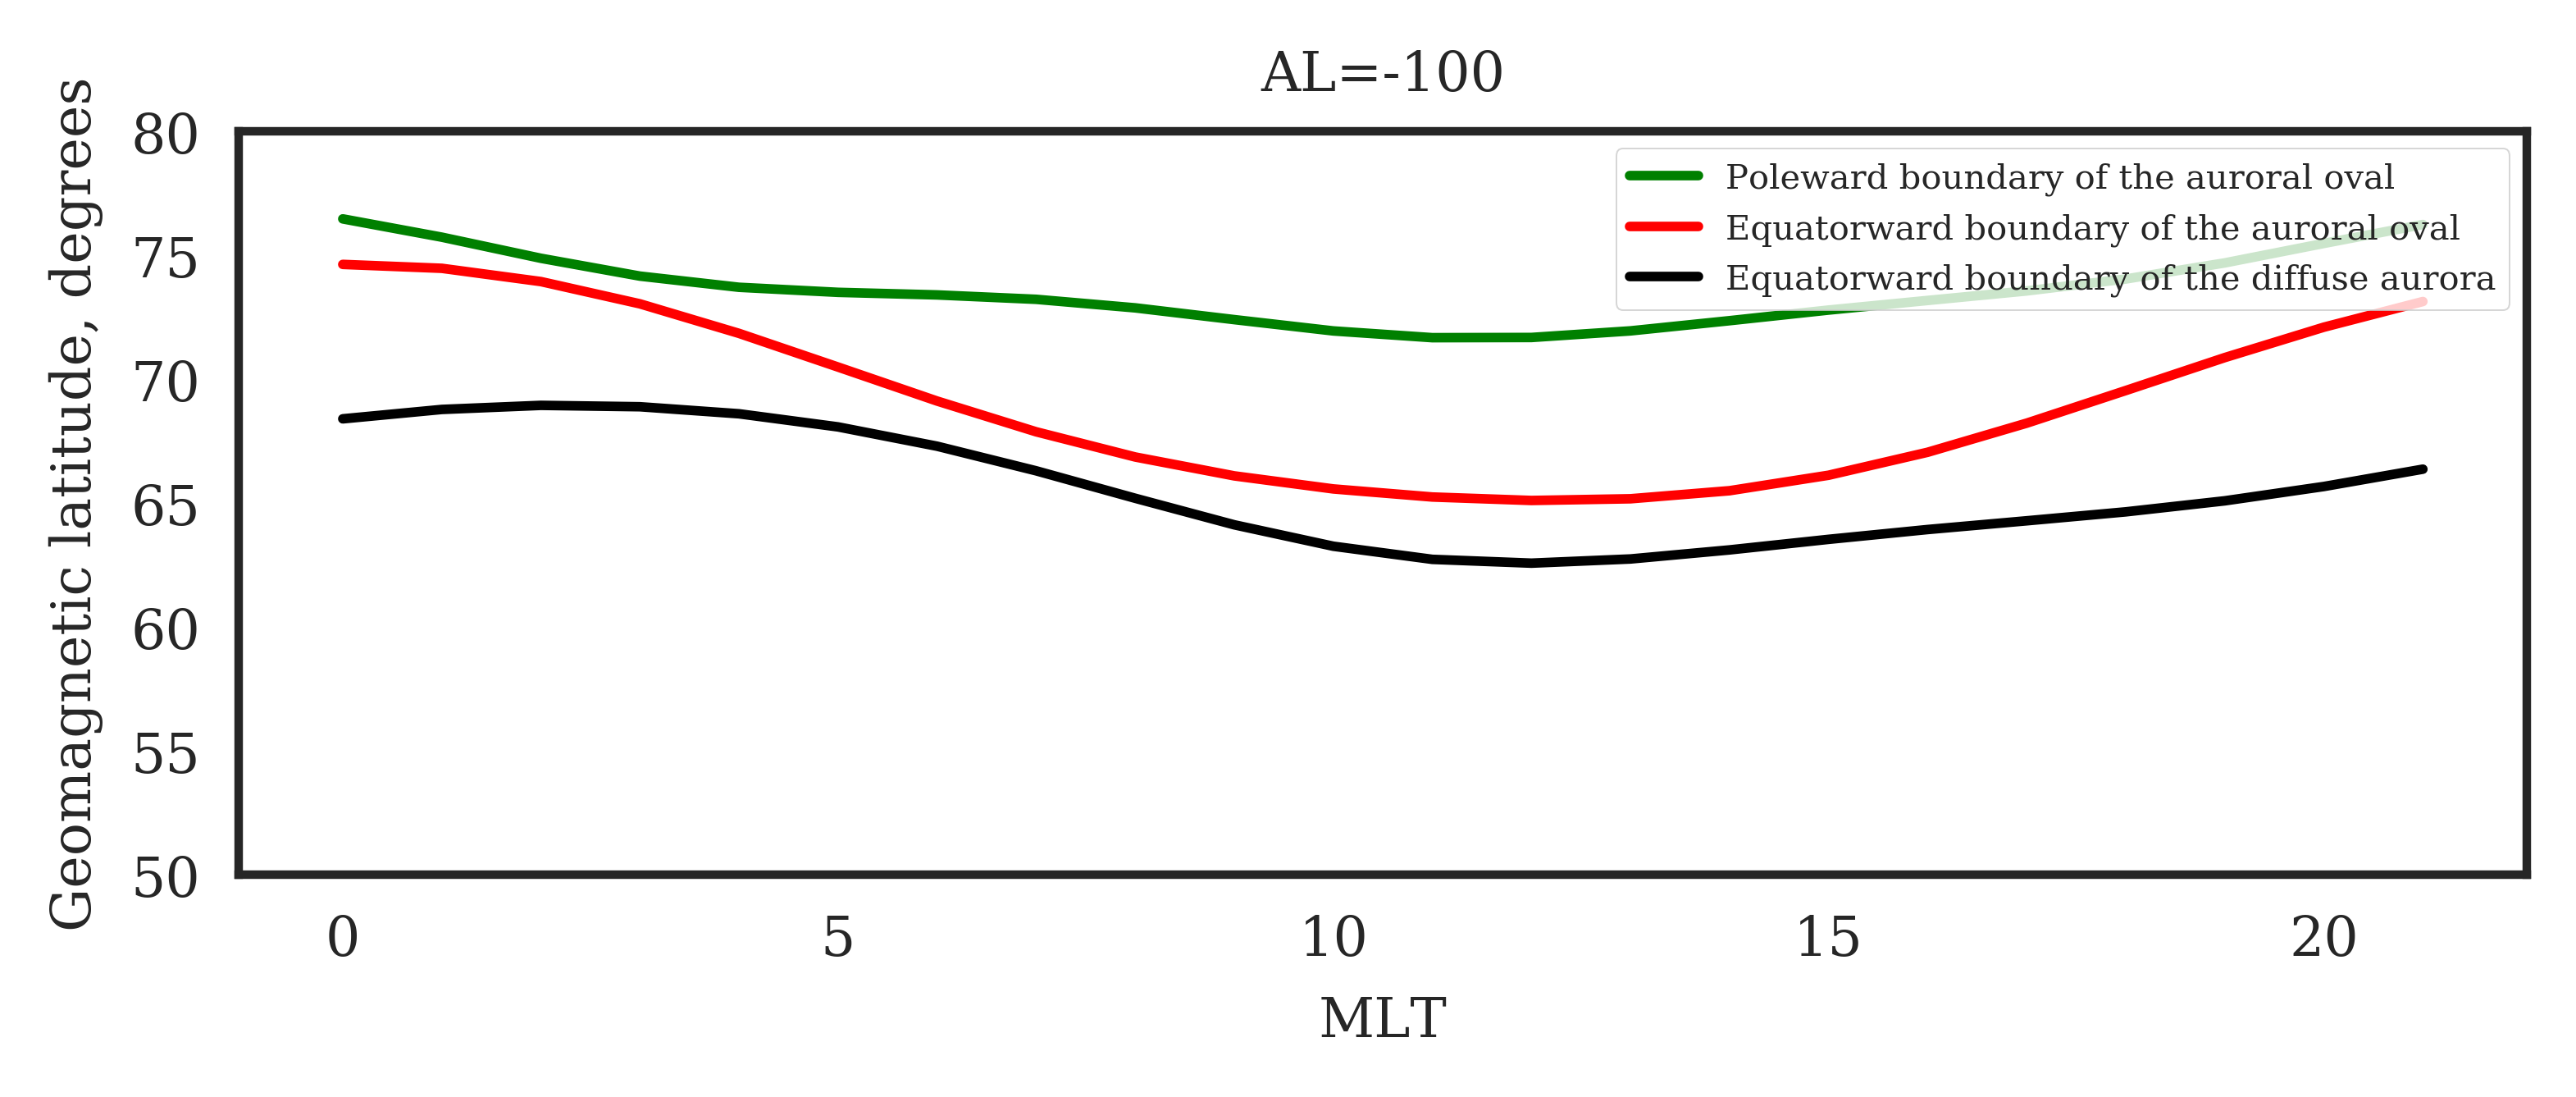

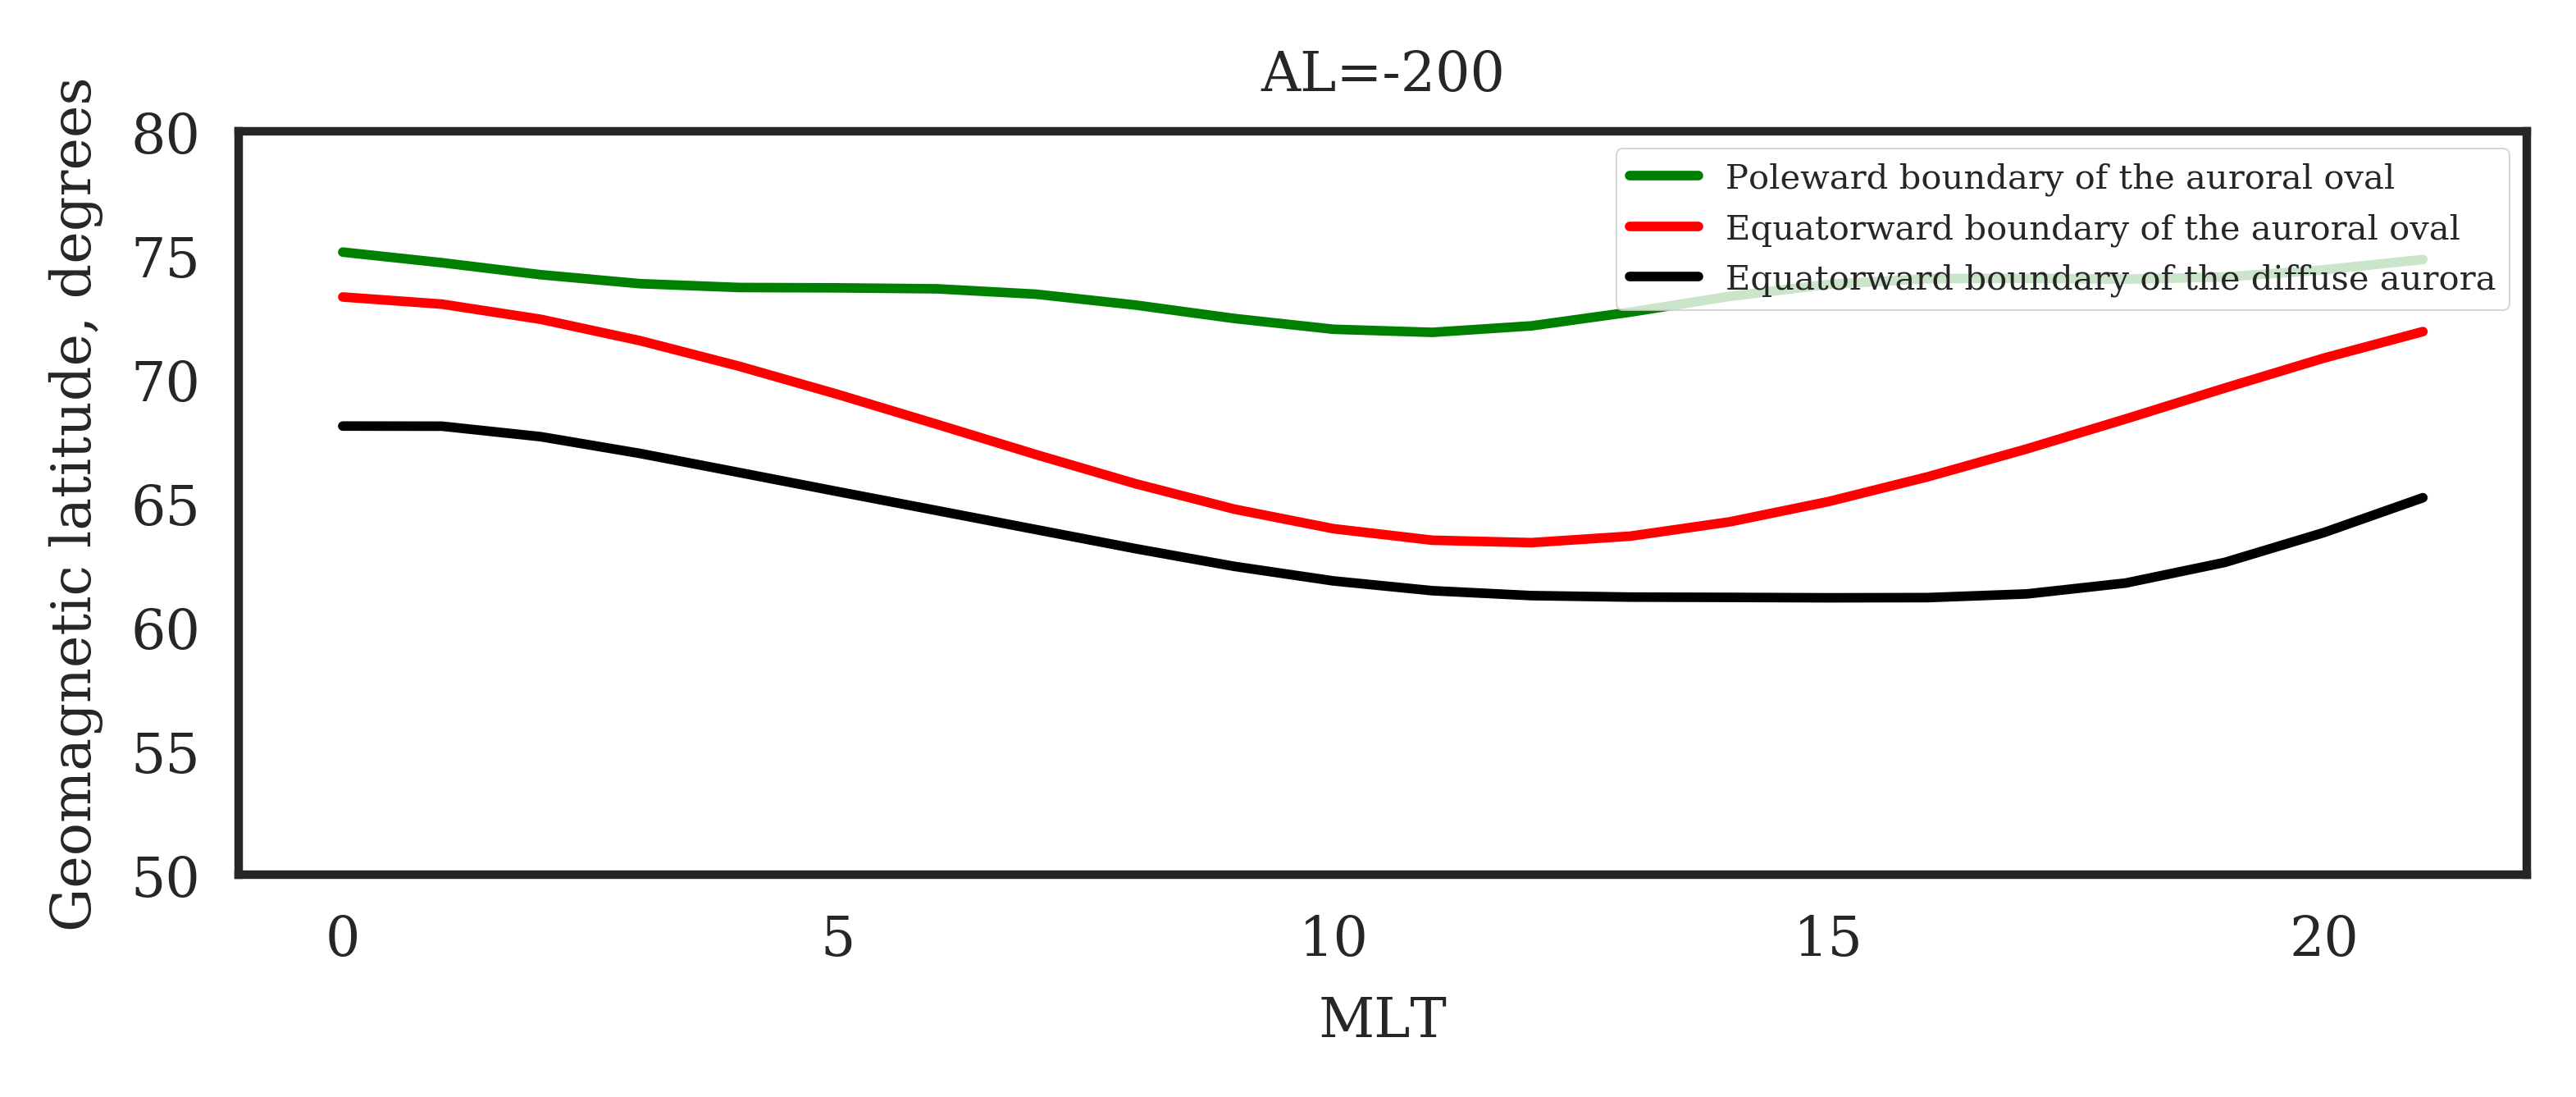

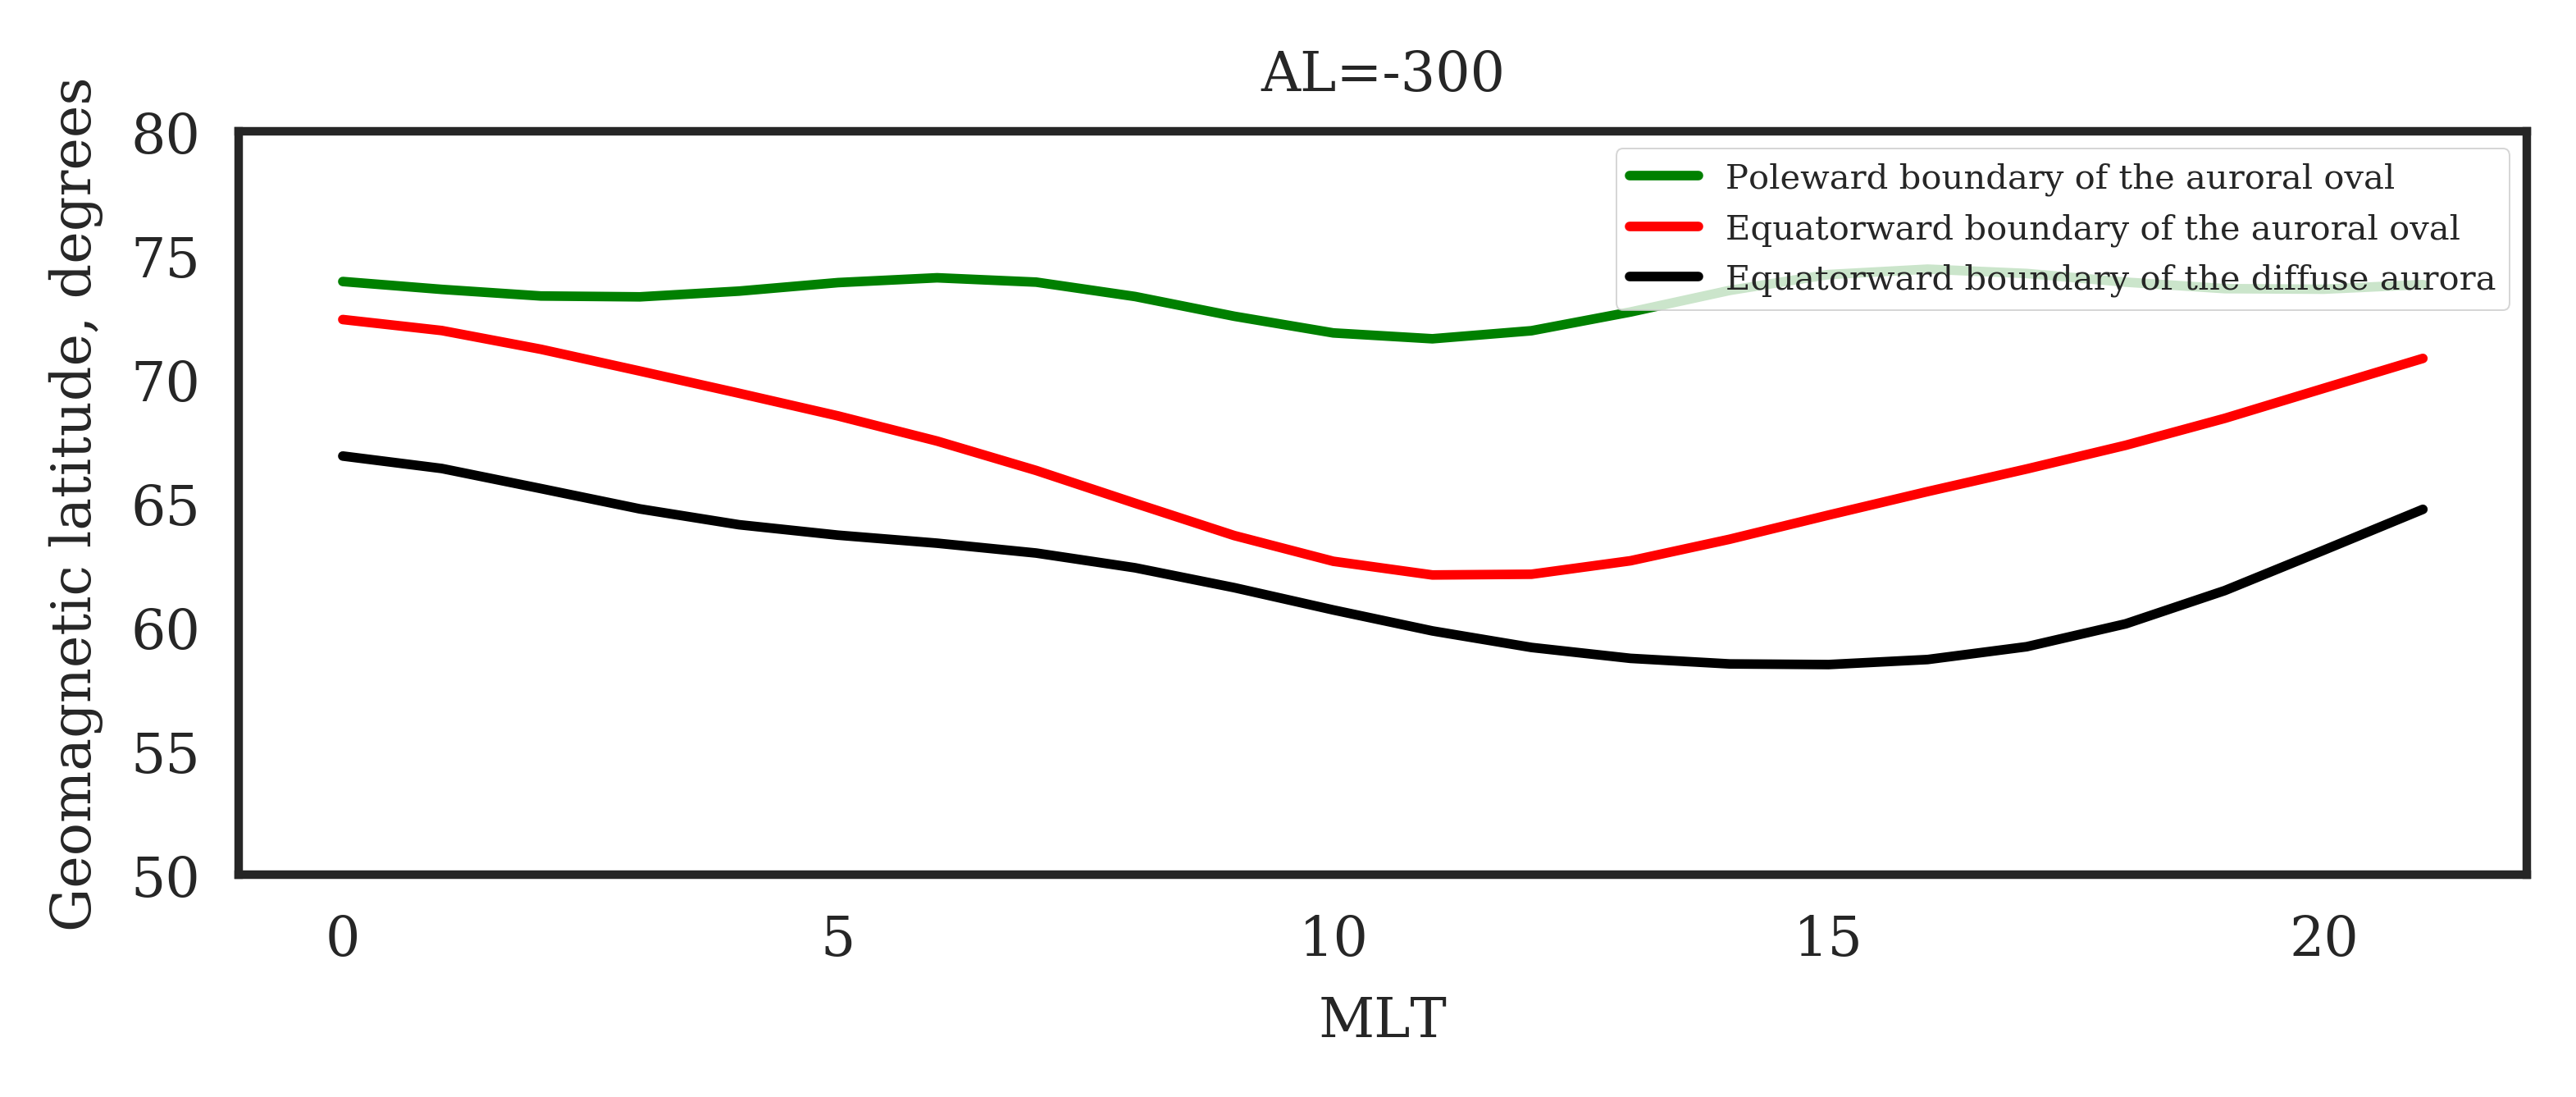

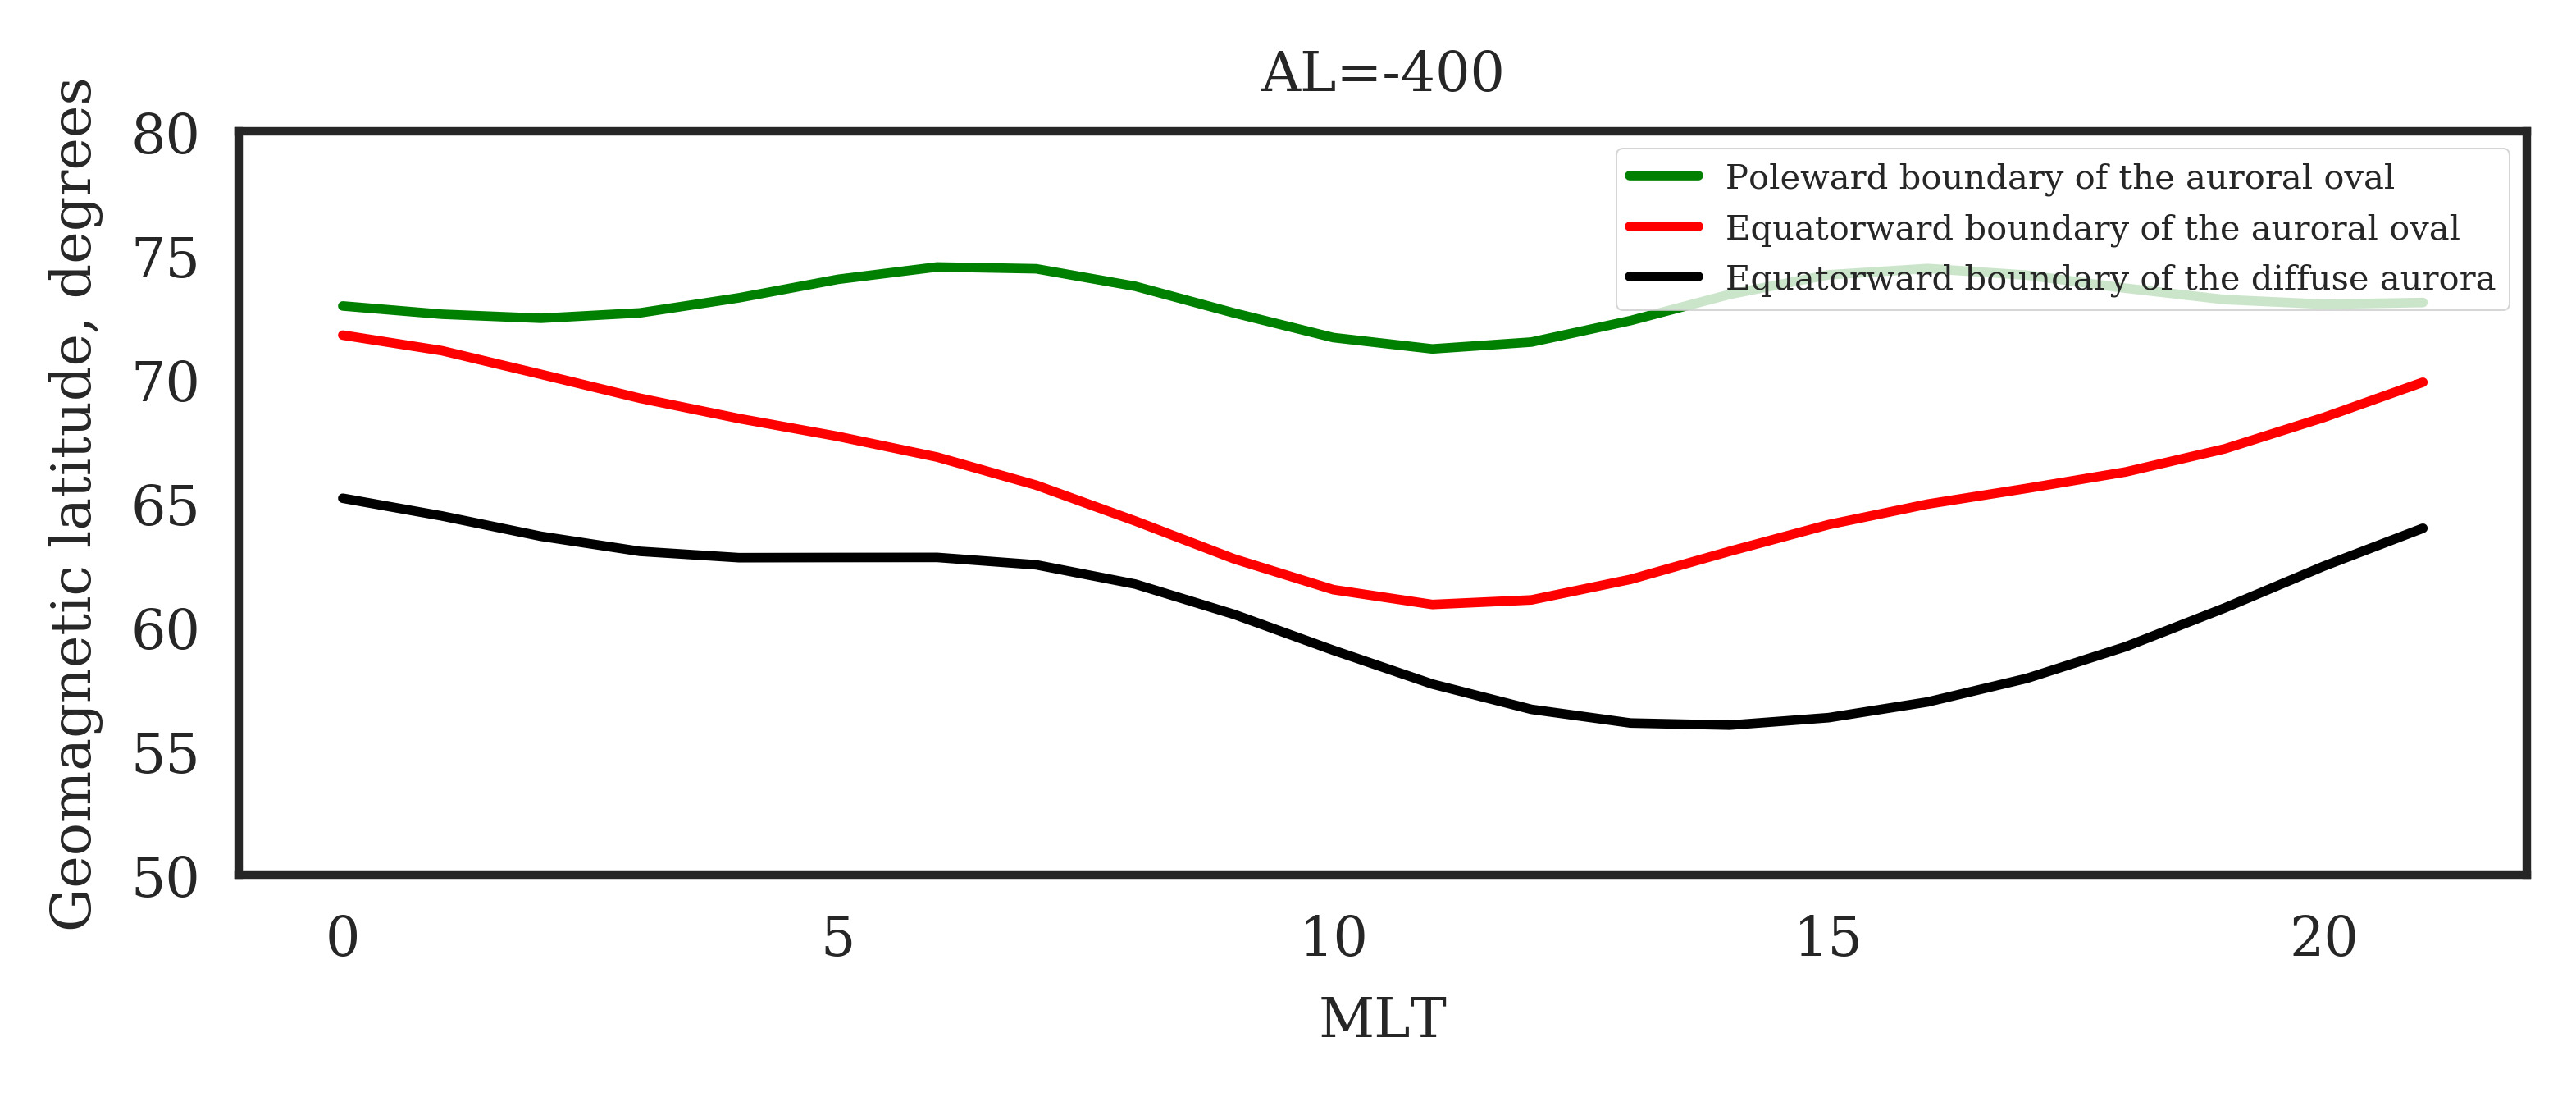

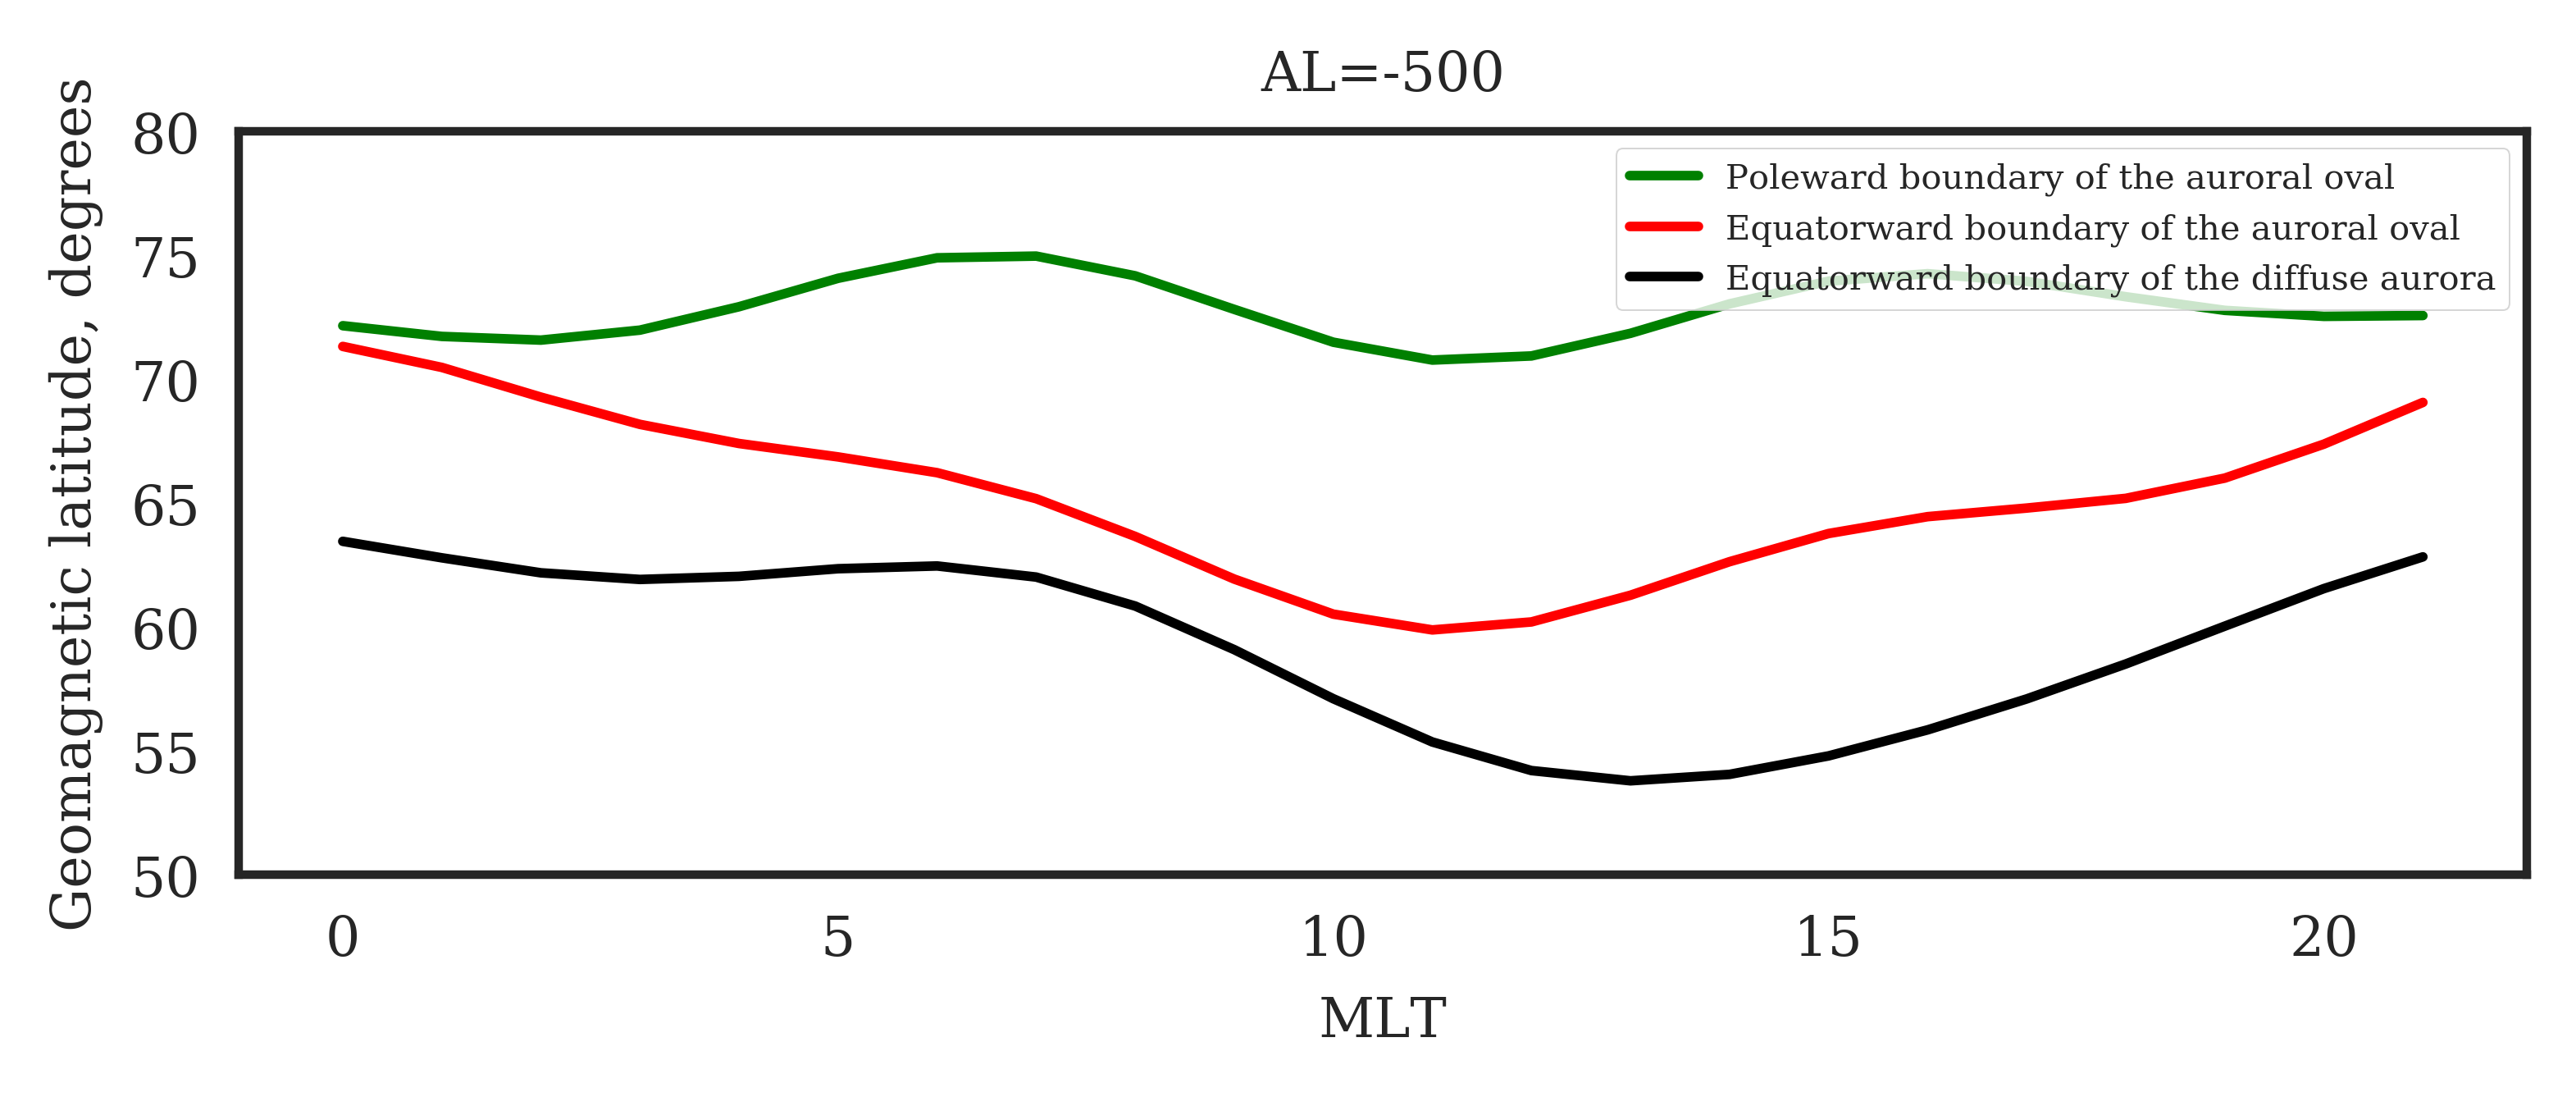

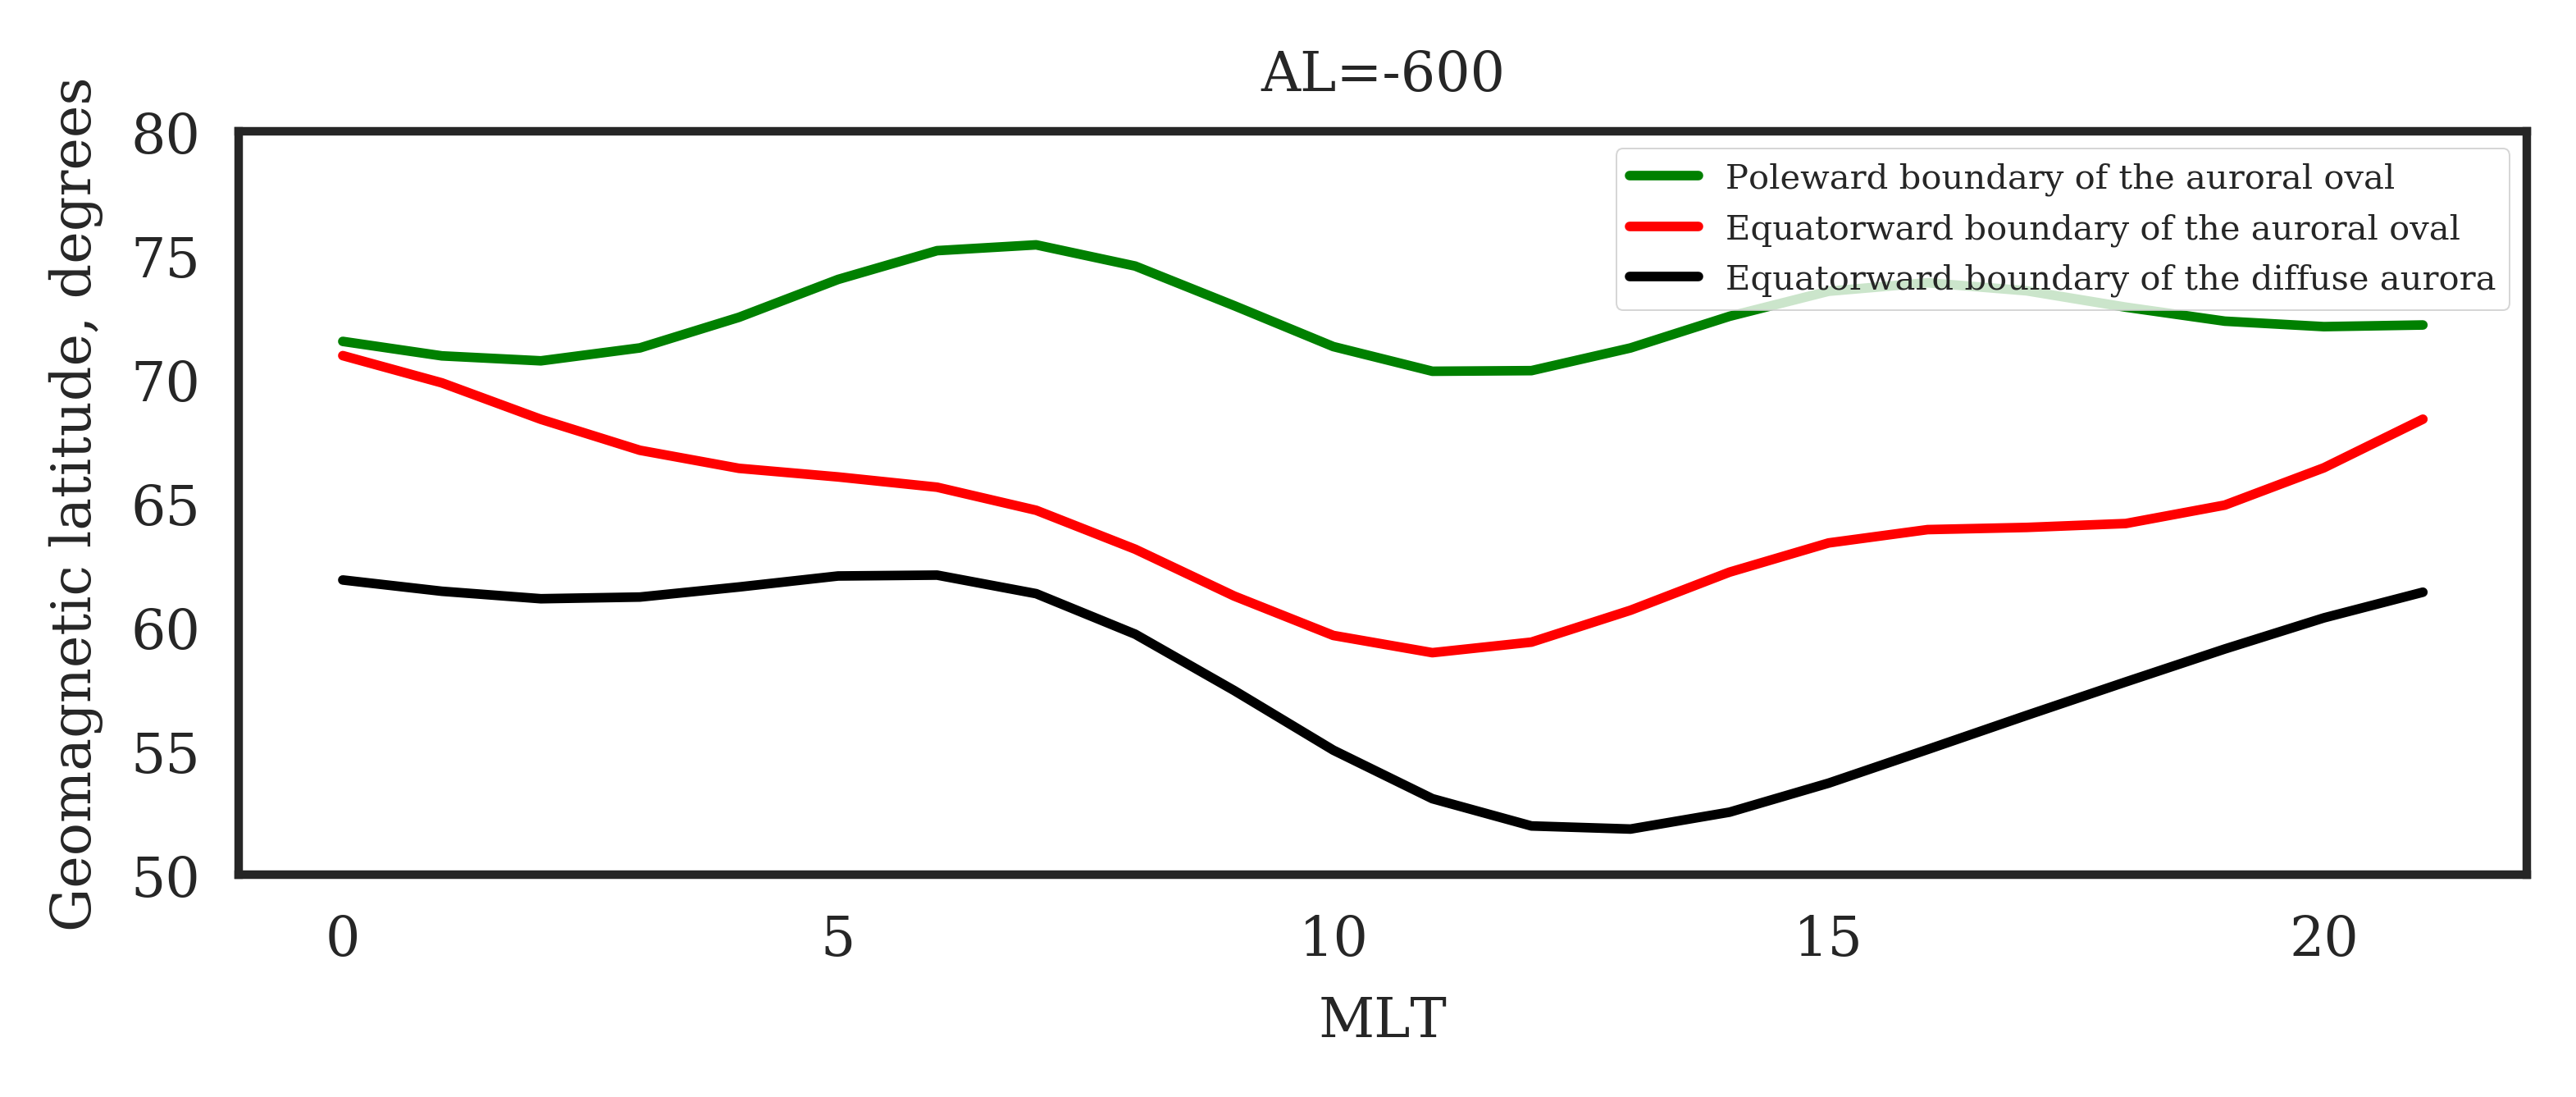

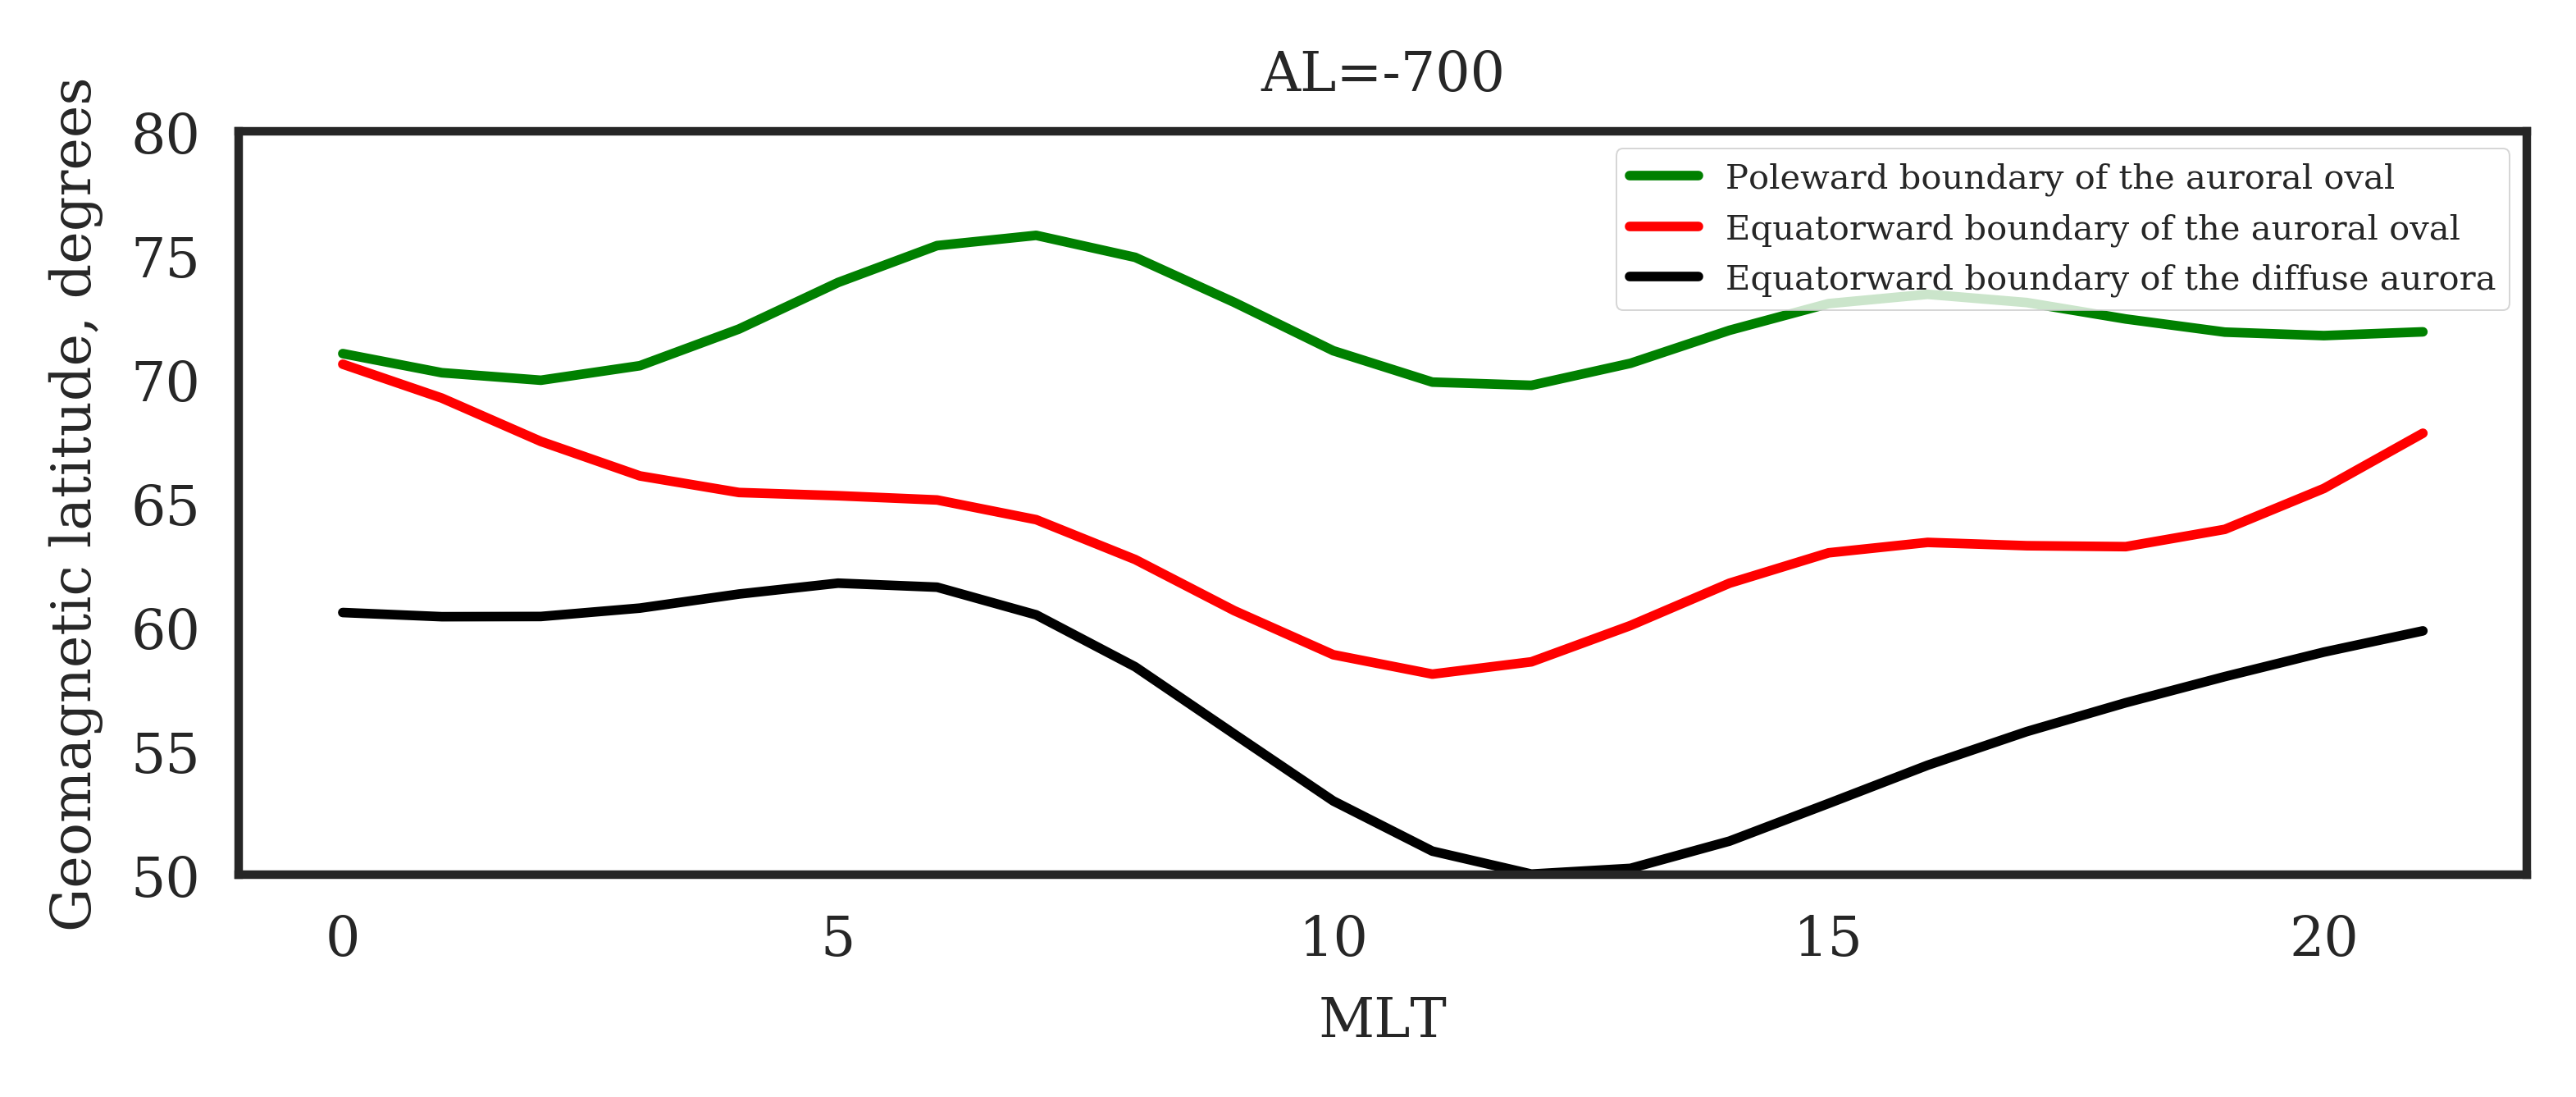

In [7]:
for i in range (0,len(AL_range) - 1):
    
    plt.plot(theta_pole[i,2:], 'g', label='Poleward boundary of the auroral oval')
    plt.plot(theta_equator[i,2:],'r', label='Equatorward boundary of the auroral oval')
    plt.plot(theta_diffuse[i,2:],'k', label='Equatorward boundary of the diffuse aurora')
    plt.title('AL={}'.format(AL_range[i]))
    plt.legend(loc='upper right')
    plt.xlabel('MLT')
    plt.ylabel('Geomagnetic latitude, degrees')
    plt.ylim((50, 80))
    plt.show()

# Conclusion

 From the plots, we can see that with the increase of absolute value AL index polar aurora's ovals move closer to equator, as the intersity of magnetic field increases. <br>
 Geomagnetic latitudes are connected with the magnetic local time. During magnetic night hours, polar aurora moves closer to equator.

# Part 2

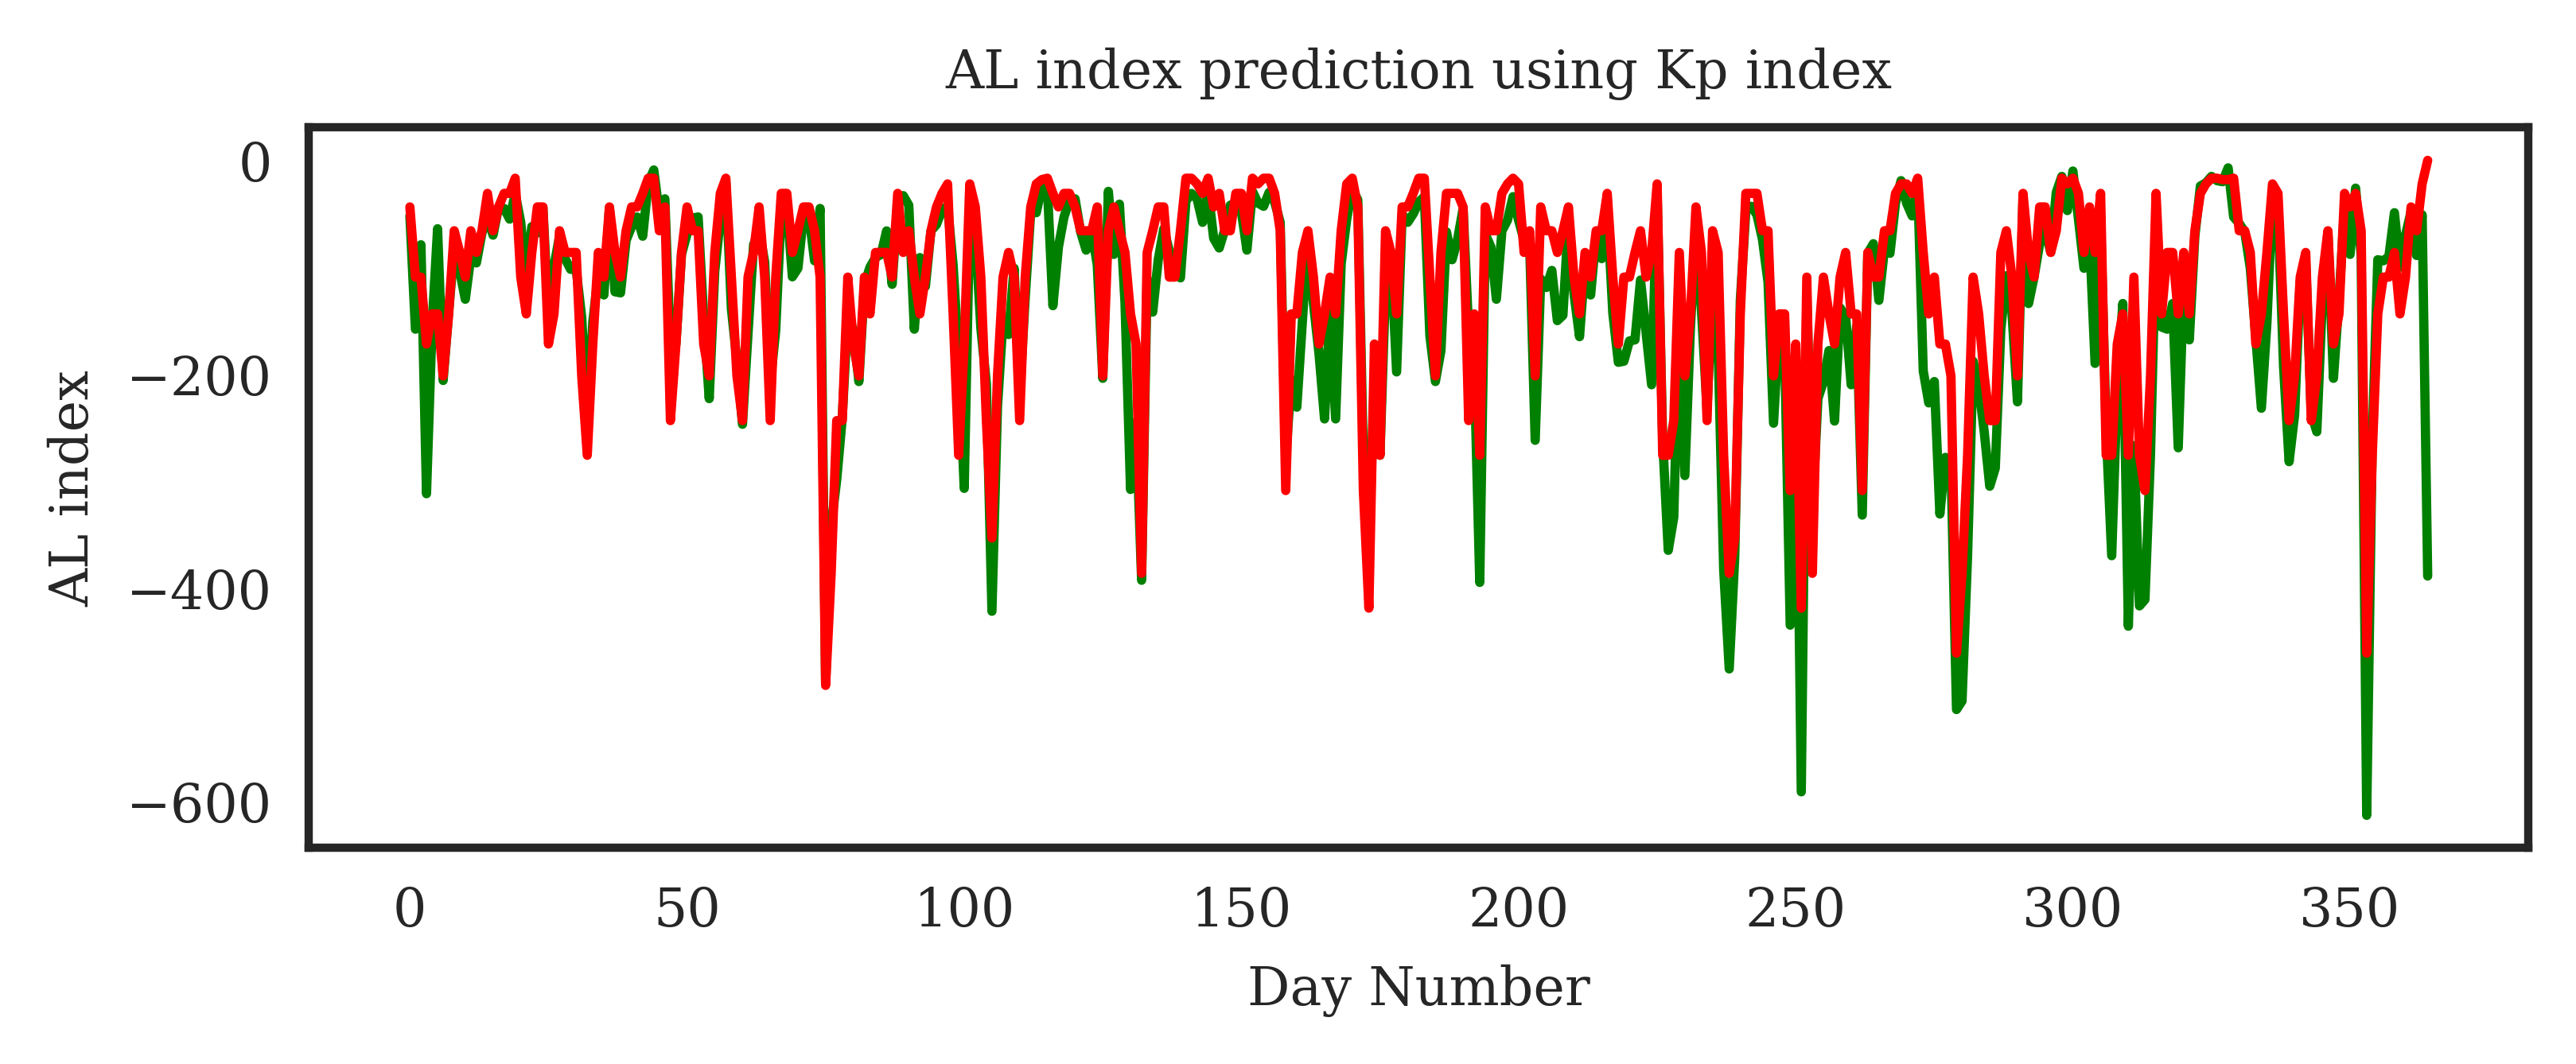

In [53]:
m = 365
c = [18, -12.3, 27.2, -2.0]
AL_KP_predicted = np.zeros(m)

for i in range (0, m-1):
    AL_KP_predicted[i] = c[0] + c[1]*Kp[i] + c[2]*Kp[i] **2 + c[3]*Kp[i] **3

from sklearn.metrics import mean_squared_error
AL_KP_predicted = -AL_KP_predicted
RMSEKP = np.sqrt(mean_squared_error(AL[-20:], AL_KP_predicted[-20:]))

plt.plot(AL, 'g', label='AL')
plt.plot(AL_KP_predicted,'r', label='AL_KP_predicted')
plt.title("AL index prediction using Kp index")
plt.xlabel('Day Number')
plt.ylabel('AL index')
plt.show()

In [9]:
AL_wind_predicted = np.zeros(m)
IMF_clock = np.zeros(m)

IMF_clock[0] = math.acos(BZ[0] / np.sqrt(BY[i] **2 + BZ[i] **2))

for i in range (1,m-1):
    if (BY[i] == BZ[i]):
        IMF_clock[i] = IMF_clock[i-1]
    else:
        IMF_clock[i] = math.acos(BZ[i] / np.sqrt(BY[i] **2 + BZ[i] **2))
    
E = np.zeros(m) 
alpha = 0.0044

In [10]:
for i in range (0,m-1):
    E[i] = WindSpeed[i] * np.sqrt(BY[i] **2 / 2 + BZ[i] **2) * math.sin(IMF_clock[i]/2) **4 + alpha * WindSpeed[i] **2 * math.sin(IMF_clock[i]/2) **(0.5)

E185 = np.zeros(m)

In [11]:
for i in range (2, m-1):
    E185[i] = (E[i-2] + 8*E[i-1] + 5*E[i]) / 14

In [30]:
coef = np.polyfit(np.log10(E185[2:(m-1)]),AL[2:(m-1)],4)
y = np.polyval(coef,np.log10(E185[2:(m-1)]))
RMSEWD = np.sqrt(mean_squared_error(AL[2:(m-1)], y))

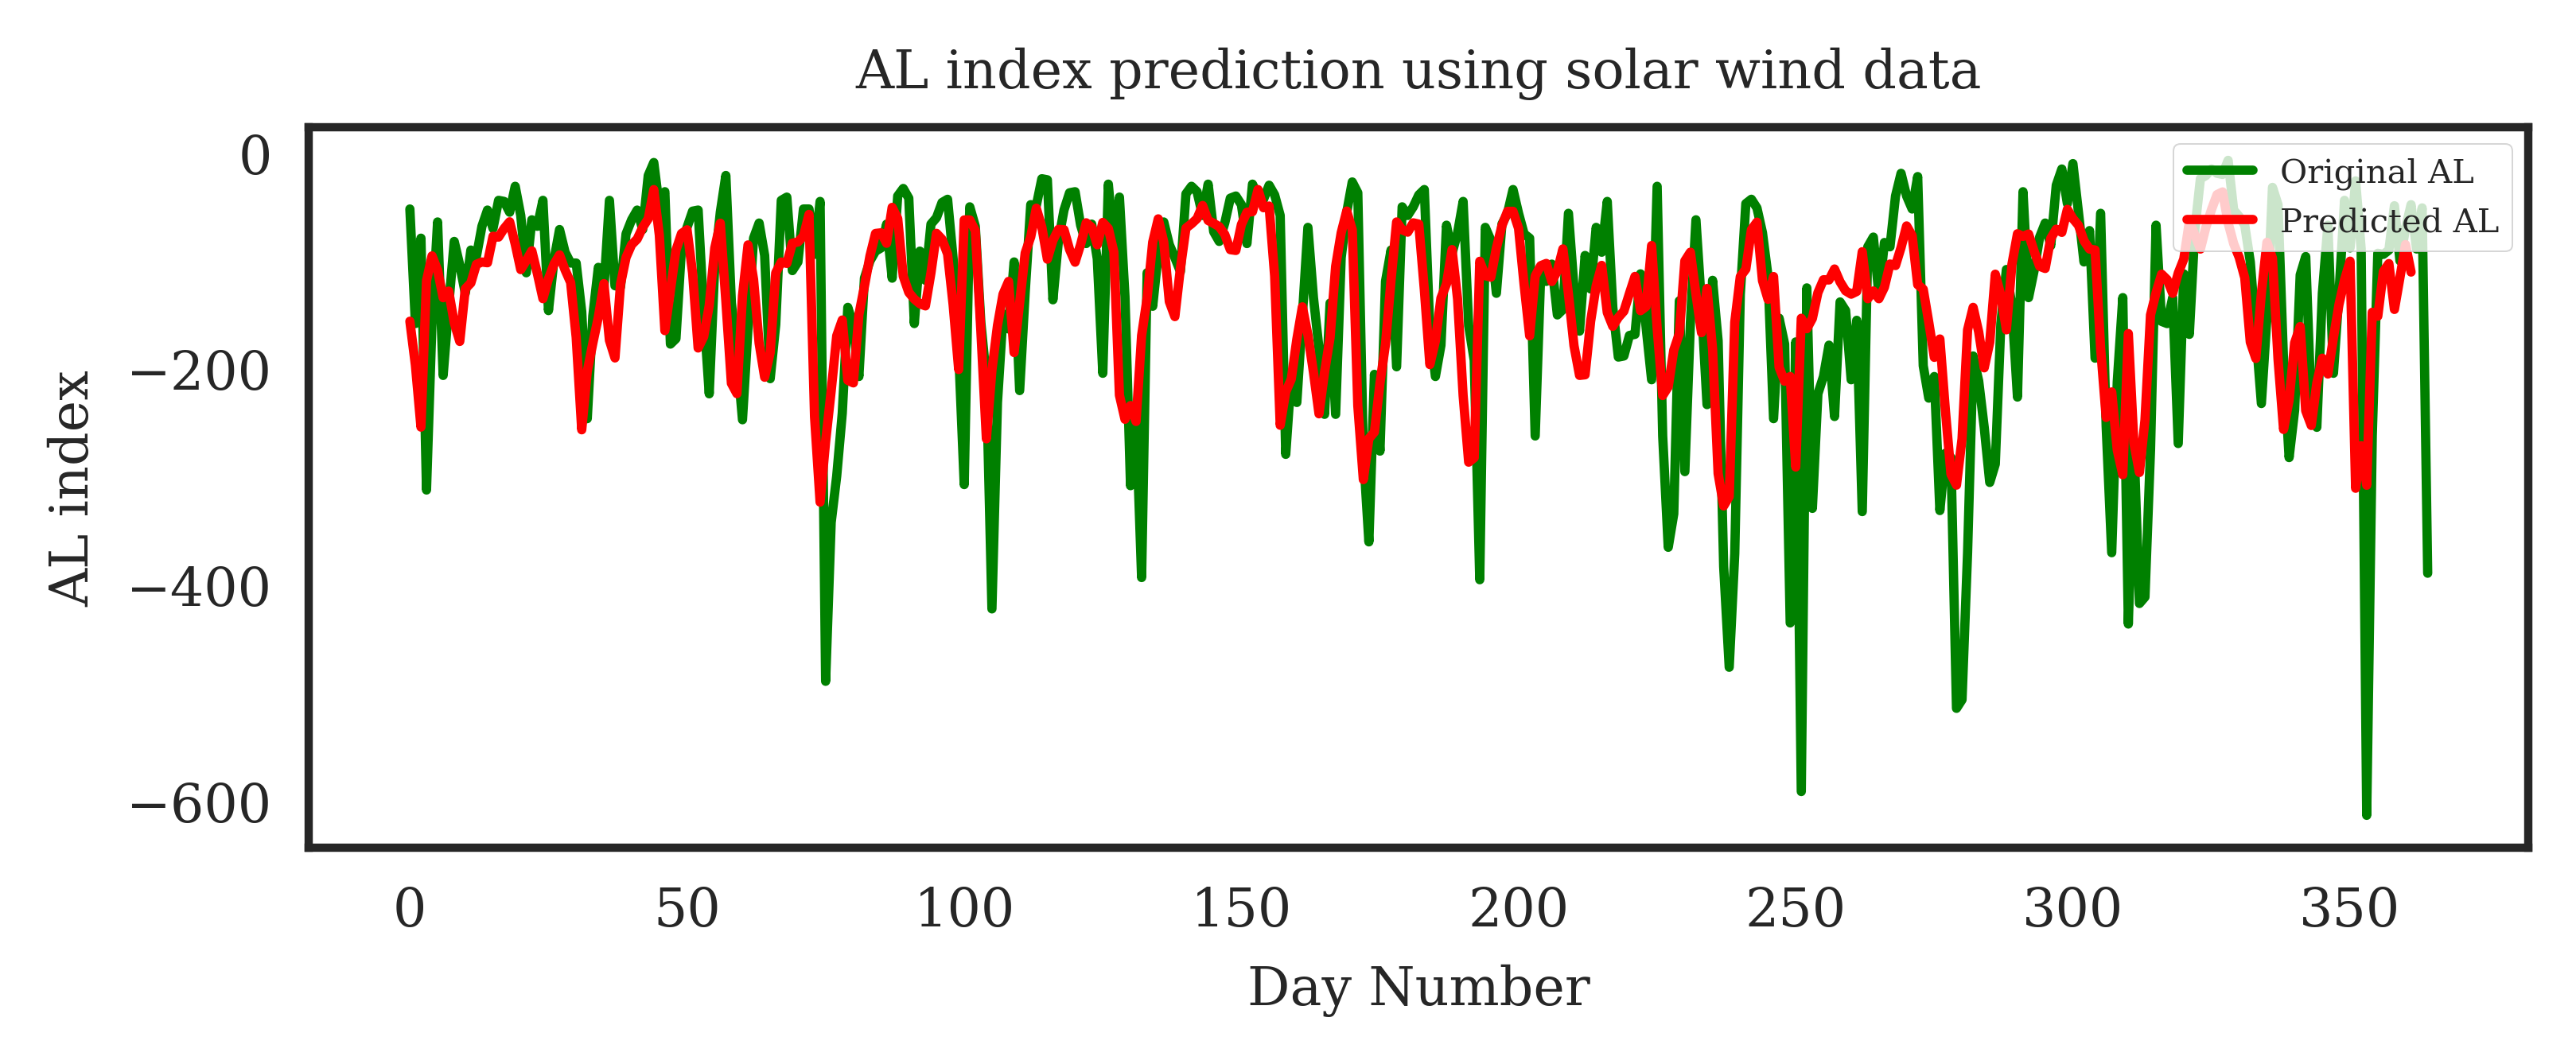

In [26]:
plt.plot(AL, 'g', label='Original AL')
plt.plot(y,'r', label='Predicted AL')
plt.title("AL index prediction using solar wind data")
plt.xlabel('Day Number')
plt.ylabel('AL index')
plt.legend(loc='upper right')
plt.show()

## Conclusion

In [54]:
RMSEKP

97.033268451598587

In [55]:
RMSEWD

83.042778498128555

Calculation of AL using solar wind is a more accurate method than KP, as it finds out that mean square error of approximation with wind data is less than with Kp index.